# In-Class 3: Sound

Last week we learned about sound waves, and you took recordings of resonanances in your lab. In today's in-class, we'll use that data (and some generated functions) to explore Fourier Transforms. 

We'll also take a look at beat frequencies, and try to understand them more fully. 

**Important:** As usual, there will be some new functions thrown in here, and I don't expect you to understand all of them. In particular, the details of performing a Fourier Transform and its inverse are a bit odd to look at. If you'd like to understand it in more detail, you're welcome to have a look at the [documentation](https://docs.scipy.org/doc/scipy/tutorial/fft.html), but it's totally fine if you don't understand exactly how the function is working.

## Working with Lab Data

With the data we took in lab, our goal is to read in the data, plot it, listen to it (!), and pick out the frequency of the tone we hear.

We'll start by importing some familiar tools, as well as some new ones: a function to do "Fast Fourier Transforms" (or FFTs) for us, and an IPython widget that will let us play sounds.

In [87]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.fft import fft, fftfreq
import IPython.display as disp

**Your turn**: write a few lines to import your data and store it in a variable called `myData`. Look back at In-Class 1 for tips, and don't forget to upload your data onto ISAAC first. You can print out your data at the end to make sure it worked.

In [88]:
# TODO: Add your code here to import your csv from the lab. 
myData = r"C:\Users\evant\Downloads\Lab3\512Hz.csv"



**Your turn again**: plot your data -- don't forget your axis labels, including units!

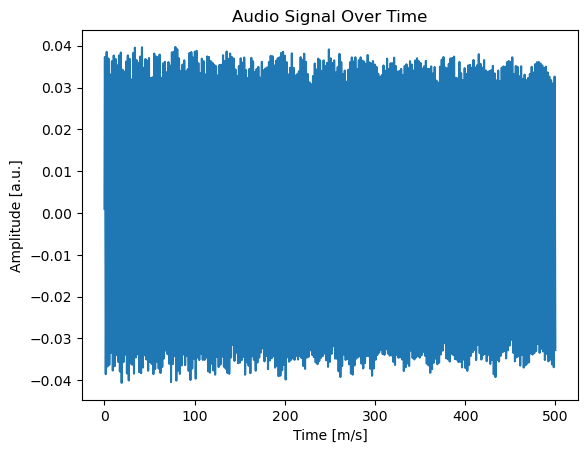

In [89]:
# TODO: Add your code here to plot and label your data. 
myData = pd.read_csv(myData)

plt.plot(myData['Time (ms)'], myData['Recording (a.u.)'])
plt.xlabel('Time [m/s]')
plt.ylabel('Amplitude [a.u.]')
plt.title("Audio Signal Over Time")
plt.show()

### Add your conclusions here:

#### By looking at your plot by eye, are you able to make a guess at the frequency that your tube was resonating at? 

No, from this graph it is very difficult to make a reading of the frequency. 

OK, now I'll take over with some code. Make sure you put your data in `myData` so that everything runs. First (mostly for fun) let's play your sound.

In [90]:
# Add a column to your dataset that has time in seconds to make our lives easier
myData["Time (s)"] = myData["Time (ms)"]*0.001

# To play our data, we need to tell it the frame rate (just like we did with our animation)
# To do that we'll first calculate the time length of each step, then the rate = 1/T
# The value of T is just the total amount of time in the recording divided by the number of steps
N = len(myData["Time (s)"])    # This is how we get the length of a list in Python
T = (myData["Time (s)"][N-1] - myData["Time (s)"][0])/N

# And with that sorted out we can now play our recording
disp.display(disp.Audio(myData["Recording (a.u.)"], rate=1/T))


Below we'll use the FFT function to produce a plot of the amplitude as a function of frequency $\omega$ rather than time. The function will break down the recording into its components for you. 

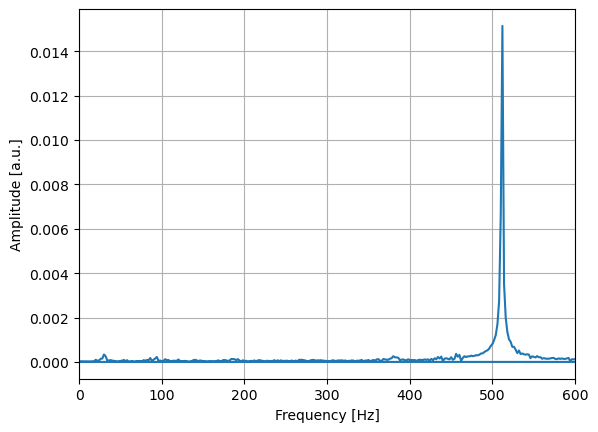

In [91]:
# The FFT function expects numpy arrays, which are similar but slightly different from the 
# Pandas dataframe columns we've been using -- we just have to convert usin gthis function. 
y = myData["Recording (a.u.)"].to_numpy()

# Now it's time to calculate our x and y points for the FFT plot. 
fft_y = np.abs(fft(y)/N) # This function figures out our amplitudes. We take the absolute value to get rid of imaginary results, and divide by N to keep the amplitudes normalized.
fft_x = fftfreq(N, T)    # This function makes the corresponding frequency axis using the N and T we calculated earlier

plt.plot(fft_x, fft_y)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [a.u.]")
plt.xlim([0,600])        # Play with this if your target frequency is outside of this range
plt.grid()
plt.show()

### Add your conclusions here:

#### What features do you see? Which is strongest? How does this compare to your expected resonant frequency? 

The strongest feature that I notice is the sharp peak at ~ 510 Hz, which makes since for my expected resonant frequency/that of the tuning fork was that of 512 Hz.

## Making our own waves

Now let's try working with cleaner 'data' and simulating our own waves. Let's try generating our own sine wave, and checking if we get the expected frequency back from our FFT. Below, add the equation for your sine wave, keeping in mind that we're going to do this as a function of $f$ (in Hz) not $\omega$. Use the relationship between the two to write down the correct wave.

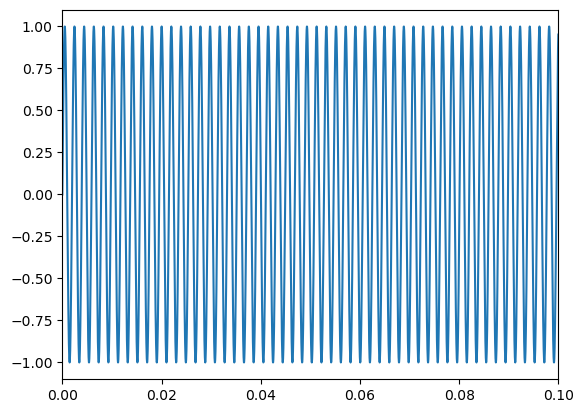

In [92]:
def makeSine(freq, nsec):
    
    # Calculate the rate (this is actually from our last sample, but this is the standard audio rate)
    rate = 1/T  
    
    # Generate our x and y points
    t = np.linspace(0, nsec, int(nsec*rate))
    y = np.sin(2 * np.pi * freq * t)
    
    # Plot our function
    plt.plot(t, y)
    plt.xlim([0,.1])    # Without this, we're looking at way too many waves and can't see the structure!
    plt.show()
    
    # Make our function play a sound
    disp.display(disp.Audio(y, rate=rate))
    
    return t, y
        
# Pick a frequency f (not omega!) that we'll simulate, and stipulate the length of the recording
t, y = makeSine(512, 3)

Now let's see if we can get our calculated frequency back. 

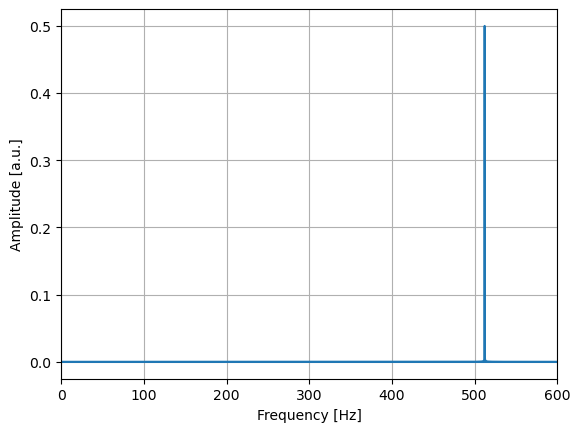

In [93]:
# Get the length of the sample
N = len(t)

# Now it's time to calculate our x and y points for the FFT plot. 
fft_y = np.abs(fft(y)/N) # This function figures out our amplitudes. We take the absolute value to get rid of imaginary results, and divide by N to keep the amplitudes normalized.
fft_x = fftfreq(N, T)    # This function makes the corresponding frequency axis using the N and T we calculated earlier

plt.plot(fft_x, fft_y)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [a.u.]")
plt.xlim([0,600])        # Play with this if your target frequency is outside of this range
plt.grid()
plt.show()

Hopefully this time you see a much cleaner peak, with just the frequency you generated. What happens if we make a wave that's a superposition of a few waves? 

**Your turn:** Using the chart below, generate a basic C chord: create and sum three sine waves with the frequencies for C4, E4, and G4. Plot them, and make an audio clip that plays the sound. 

![chart](http://assets.becauselearning.com/images/files/000/001/001/original/blob?1472189156)


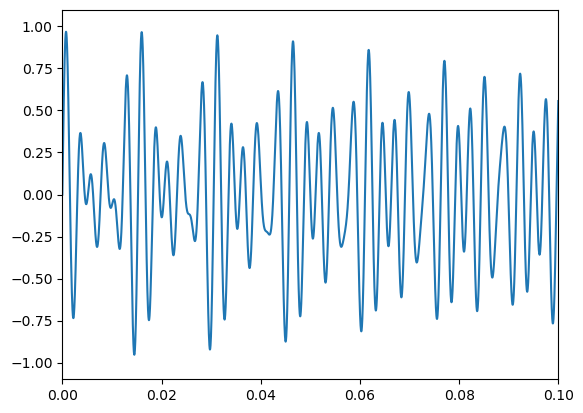

In [94]:
def makeChord(f1, f2, f3, nsec):
    rate = 1/T
     
    t = np.linspace(0, nsec, int(nsec*rate))
    y1 = np.sin(2 * np.pi * f1 * t) 
    y2 = np.sin(2 * np.pi * f2 * t) 
    y3 = np.sin(2 * np.pi * f3 * t) 

    y = (y1 + y2 + y3) / 3
    
    plt.plot(t, y)
    plt.xlim([0,.1])
    plt.show()

    disp.display(disp.Audio(y, rate=rate))
    
    return t, y    
        
# Pick a frequency f (not omega!) that we'll simulate, and stipulate the length of the recording
t, y = makeChord(261.686, 329.724, 392.089, 3)


This is a much more complex function, but if we put it through an FFT, we can see that we can recover its simplest form, just a sum of its components.

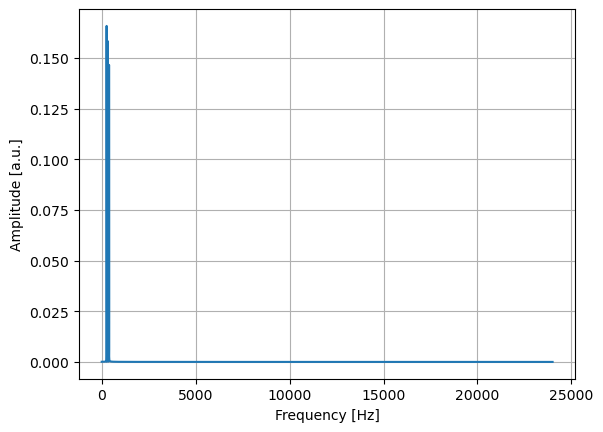

In [95]:
# Get the length of the sample
N = len(t)

# Now it's time to calculate our x and y points for the FFT plot. 
fft_y = np.abs(fft(y)/N) # This function figures out our amplitudes. We take the absolute value to get rid of imaginary results, and divide by N to keep the amplitudes normalized.
fft_x = fftfreq(N, T)    # This function makes the corresponding frequency axis using the N and T we calculated earlier

plt.plot(fft_x[:N//2], fft_y[:N//2])
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [a.u.]")
#plt.xlim([0,600])        # Play with this if your target frequency is outside of this range
plt.grid()
plt.show()

### Add your conclusions here:

#### Try playing with the length of your recording. How does this affect the fourier transform? What do you think is happening here? (Changing the plot to a scatter plot may help here!)

Changing the length of the recording does in fact affect the fourier transform. By changing the recording length, this changes the amplitude of the 3 peak frequencies. When the new recording length is divisible by three, the peak frequencies stay in the same place, but if the recording length is not divisible by 3 the peaks alternate in their amplitudes. This a result of the peak frequencies oscillating and recurring on certain time intervals, but inbetween these intervals the peak frequencies are different. 

#### Now try removing the limits on the plot (comment out the xlim line). How does changing the length of the recording affect the range? What do you think is happening here?  Where does this range come from?

After commenting out the xlim line and changing the length of the recording, I notice that the range stays unchanged, with the range remaining from [0, 25000]. I think the range is not affected by the length of the recording, for the range is dependent on the samepling rate. 

Now let's learn a little bit about beat frequencies. As you learned in class, a beat frequency is the sound you hear when two waves with different frequencies are played at the same time. What you're hearing is the frequency of the evolving envelope from their interference patterns. The beat frequency is given by:
$$ f_b = |f_1 - f_2| $$

Below is an animation that lets you play with the frequencies and amplitudes of two waves to produce beats. Try running it, and make adjustments to see the how the structure of the beat changes. 

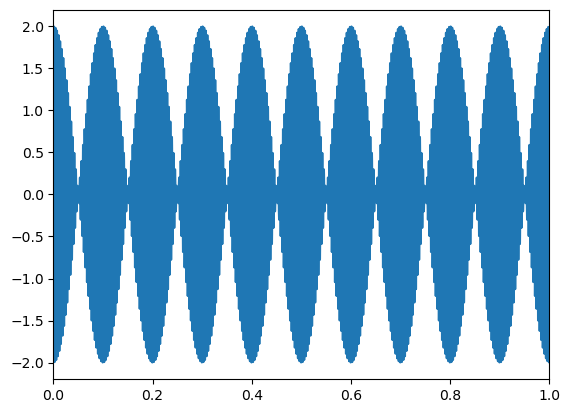

In [96]:
def makeBeat(f1, f2, nsec):
        
    # Calculate the rate (this is actually from our last sample, but this is the standard audio rate)
    rate = 1/T  
    
    # Generate our x and y points
    t = np.linspace(0, nsec, int(nsec*rate))
    y1 = np.sin(2*np.pi*f1*t) 
    y2 = np.sin(2*np.pi*f2*t) 
    y = y1+y2
    
    # Plot our function
    plt.plot(t, y)
    plt.xlim([0,1])    # Without this, we're looking at way too many waves and can't see the structure!
    plt.show()
    
    # Make our function play a sound
    disp.display(disp.Audio(y, rate=rate))
    
    return t, y
        
# Pick a frequency f (not omega!) that we'll simulate, and stipulate the length of the recording
t, y = makeBeat(320, 310, 3)

Here's an FFT of the signal you just generated.

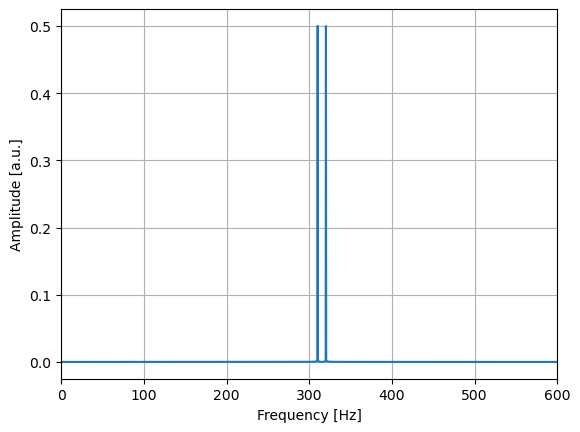

In [97]:
# Get the length of the sample
N = len(t)

# Now it's time to calculate our x and y points for the FFT plot. 
fft_y = np.abs(fft(y)/N) # This function figures out our amplitudes. We take the absolute value to get rid of imaginary results, and divide by N to keep the amplitudes normalized.
fft_x = fftfreq(N, T)    # This function makes the corresponding frequency axis using the N and T we calculated earlier

plt.plot(fft_x[:N//2], fft_y[:N//2])
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [a.u.]")
plt.xlim([0,600])        # Play with this if your target frequency is outside of this range
plt.grid()
plt.show()

### Add your conclusions here:

#### Adjust your input frequencies to get a beat frequency of around 10 Hz. Can you hear the beat? If not, try adjusting your frequencies to make sure they're all in audible range. 

I can hear the beat, it sounds very interesting. 
#### Does your beat frequency show up on your FFT? Why or why not? 

The beat frequency does not show up in the FFT, rather the two frequencies that make the beat are what show up. This is because the beat frequency is 10 Hz, and it is not a frequency that is actually being played it is just the difference of the two. That is why we do not see a peak at 10 Hz. 

### _For a challenge..._

Here are three extensions to today's exercises that are beyond the scope of what's expected of you in this class. Give them a try if you'd like, or ignore this completely! 

1. Try generating a square wave with frequency 440 Hz, playing it and Fourier transforming it. What do you see?
2. Try generating a sawtooth wave with frequency 440 Hz, playing it and Fourier transforming it. What do you see?
3. Compose a short tune with generated waves.